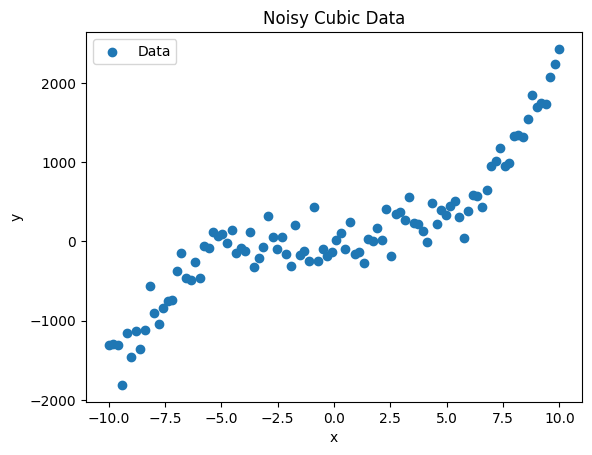

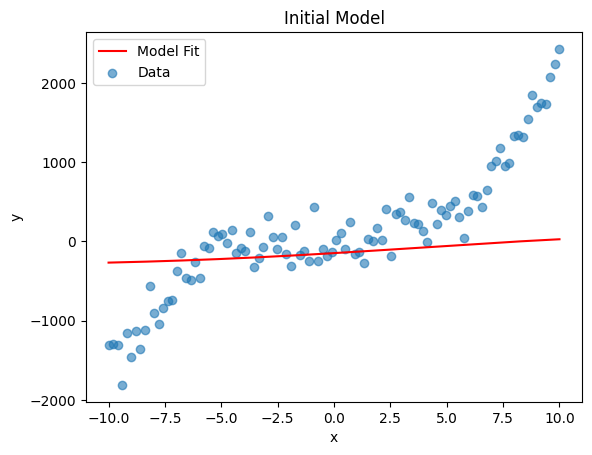

Epoch 0, Loss: 0.5933
Epoch 200, Loss: 0.0373
Epoch 400, Loss: 0.0317
Epoch 600, Loss: 0.0307
Epoch 800, Loss: 0.0302
Epoch 1000, Loss: 0.0298
Epoch 1200, Loss: 0.0294
Epoch 1400, Loss: 0.0289
Epoch 1600, Loss: 0.0286
Epoch 1800, Loss: 0.0283


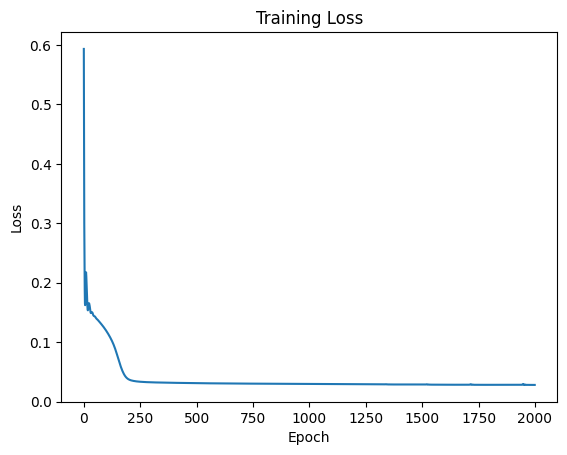

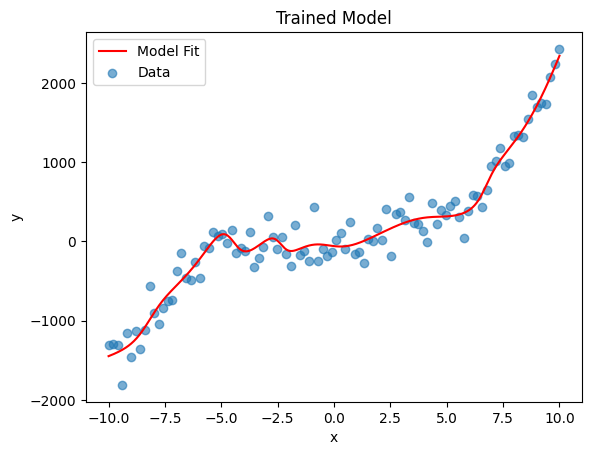

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# -------------------------------
# Data: Noisy cubic
# -------------------------------
torch.manual_seed(42)
X = torch.linspace(-10, 10, 100).view(-1, 1)  # Inputs
y = 2*X**3 + 3*X**2 + 5 + 200*torch.randn(100, 1)  # Cubic with noise

plt.scatter(X.numpy(), y.numpy(), label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Noisy Cubic Data")
plt.legend()
plt.show()

# -------------------------------
# Scale data for better training stability
# -------------------------------
X_scaled = X / 10.0
y_scaled = y / 1000.0

# -------------------------------
# Model: Small MLP for non-linear regression
# -------------------------------
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1, 128)
        self.hidden2 = nn.Linear(128, 128)
        #self.hidden3 = nn.Linear(128, 128)
        self.output  = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.tanh(self.hidden1(x))  # non-linear activation
        x = torch.tanh(self.hidden2(x))
        #x = torch.tanh(self.hidden3(x))
        return self.output(x)

model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# -------------------------------
# Utility function to plot model fit
# -------------------------------
def plot_fit(title):
    plt.figure()
    with torch.no_grad():
        x_fit = torch.linspace(-10, 10, 500).view(-1, 1)  # finer grid for smoother curve
        x_fit_scaled = x_fit / 10.0
        y_fit = model(x_fit_scaled) * 1000.0  # scale back to original
        plt.plot(x_fit.numpy(), y_fit.numpy(), 'r', label="Model Fit")
        plt.scatter(X.numpy(), y.numpy(), label="Data", alpha=0.6)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

# Plot initial model before training
plot_fit("Initial Model")

# -------------------------------
# Training loop
# -------------------------------
epochs = 2000
losses = []

for i in range(epochs):
    y_pred = model(X_scaled)          # forward pass
    loss = criterion(y_pred, y_scaled)  # compute loss
    losses.append(loss.item())

    optimizer.zero_grad()             # reset gradients
    loss.backward()                   # backpropagation
    optimizer.step()                  # update weights

    if i % 200 == 0:
        print(f"Epoch {i}, Loss: {loss.item():.4f}")

# -------------------------------
# Plot training loss
# -------------------------------
plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

# -------------------------------
# Plot trained model fit
# -------------------------------
plot_fit("Trained Model")
